In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from itertools import cycle
from matplotlib.patches import Rectangle

In [3]:
! rsync --progress "bluemoon-user1.uvm.edu:thesis/data/high_res/hizanidis_params.pkl" "../../data/high_res/hizanidis_params.pkl"


hizanidis_params.pkl
      256867 100%  244.97MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 2240 bytes  received 1577 bytes  2544.67 bytes/sec
total size is 256867  speedup is 67.30


In [23]:
with open("../../data/high_res/hizanidis_params.pkl", "rb") as f:
    params = pickle.load(f)

params.head()

,alpha,beta,metastability,chimera,max_phase
0,0.85443,0.27342,0.047703,0.049395,25132.741229
1,0.34177,0.19367,0.046242,0.047188,6.283185
2,0.79747,0.51266,0.056583,0.059569,25132.741229
3,0.80886,0.37595,0.062175,0.065680,25132.741229
4,0.82025,0.80886,0.044187,0.045844,25132.741229


In [24]:
params.shape

(6400, 5)

In [25]:
good = params[params["max_phase"] <= 2*np.pi]

In [26]:
good.sort_values("chimera", ascending=False).head(10)

,alpha,beta,metastability,chimera,max_phase
1119,0.01139,0.00000,0.082584,0.088440,6.283185
4763,0.04557,0.01139,0.082884,0.087844,6.283185
1059,0.05696,0.02278,0.081909,0.087528,6.283185
2444,0.03418,0.01139,0.080512,0.086116,6.283185
1165,0.05696,0.01139,0.080556,0.084908,6.283185
3386,0.02278,0.00000,0.075405,0.081128,6.283185
3991,0.06835,0.00000,0.075283,0.080299,6.283185
503,0.02278,0.01139,0.075849,0.080060,6.283185
1872,0.03418,0.00000,0.073000,0.077718,6.283185
5249,0.06835,0.01139,0.072499,0.075973,6.283185


In [27]:
good.shape

(4076, 5)

In [28]:
c = good.pivot_table(values="chimera", index="beta", columns="alpha")

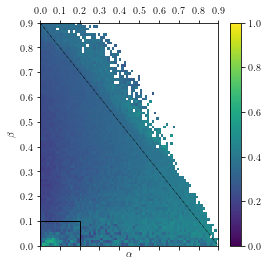

In [32]:
plt.matshow(c.values[:, :]*7, origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[0, 0.9, 0, 0.9])
plt.plot([0, 0.9], [0.9, 0], "-.", color="k", lw=0.5)
plt.plot([])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.gca().add_patch(Rectangle((0, 0), 0.2, 0.1, linewidth=1, fill=False))
plt.colorbar()
plt.gcf().set_size_inches(4, 4)
plt.savefig("../../final/figure/aphysical_chimera", dpi=700)

In [36]:
with open("../../data/zoom/hizanidis_params.pkl", "rb") as f:
    params = pickle.load(f)

params.head()

,alpha,beta,metastability,chimera,max_phase
0,0.053,0.064,0.040809,0.042223,6.283185
1,0.051,0.049,0.044980,0.045953,6.283185
2,0.091,0.085,0.039594,0.040671,6.283185
3,0.154,0.062,0.048233,0.050510,6.283185
4,0.008,0.023,0.045441,0.046159,6.283185


In [37]:
c = params.pivot_table(values="chimera", index="beta", columns="alpha")

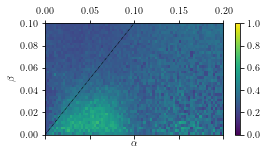

In [38]:
plt.matshow(c.values[:, :]*7, origin="lower", aspect="auto", vmin=0, vmax=1,
            extent=[0, 0.2, 0, 0.1])
plt.plot([0, 0.1], [0, 0.1], "-.", color="k", lw=0.5)
plt.plot([])
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
plt.colorbar()
plt.gcf().set_size_inches(4, 2)
plt.savefig("../../final/figure/zoom_chimera", dpi=700)